## Import Libray

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.optimizers import Adam ,RMSprop

In [59]:
import matplotlib.pyplot as plt
import numpy as np

## Data Collection

In [60]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [31]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Data Processing

In [61]:
#Normalisasi

In [33]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [34]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [35]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

## Modeling

In [36]:
input_shape = (32, 32, 3)

model_cnn =  Sequential()
model_cnn.add(Conv2D(16, (3,3), padding='same',
                     input_shape=input_shape))
model_cnn.add(Activation('relu'))
model_cnn.add(Conv2D(16, (3,3), padding='same'))
model_cnn.add(Activation('relu'))
model_cnn.add(Conv2D(16, (3,3)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D((2,2), padding='same'))
model_cnn.add(Dropout(0.4))

model_cnn.add(Conv2D(32, (3,3)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D((2,2), padding='same'))
model_cnn.add(Dropout(0.4))

model_cnn.add(Conv2D(64, (3,3)))
model_cnn.add(Activation('relu'))
model_cnn.add(MaxPooling2D((2,2), padding='same'))
model_cnn.add(Dropout(0.4))

model_cnn.add(Conv2D(128, (3,3)))
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.4))

model_cnn.add(Flatten())
model_cnn.add(Dense(1000))
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.4))

model_cnn.add(Dense(10, activation='softmax'))

In [37]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 activation_7 (Activation)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        2320      
                                                                 
 activation_8 (Activation)   (None, 30, 30, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)      

In [38]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [39]:
hist = model_cnn.fit(X_train, Y_train,
                     epochs=25,
                     batch_size=200,
                     shuffle=True,
                     validation_data=(X_test, Y_test))

Epoch 1/25
250/250 [==============================] - 13s 12ms/step - loss: 2.4487 - accuracy: 0.1417 - val_loss: 1.9197 - val_accuracy: 0.2507
Epoch 2/25
250/250 [==============================] - 3s 12ms/step - loss: 1.8854 - accuracy: 0.2663 - val_loss: 1.7298 - val_accuracy: 0.3766
Epoch 3/25
250/250 [==============================] - 3s 11ms/step - loss: 1.7292 - accuracy: 0.3386 - val_loss: 1.6097 - val_accuracy: 0.4184
Epoch 4/25
250/250 [==============================] - 3s 12ms/step - loss: 1.6175 - accuracy: 0.3894 - val_loss: 1.5125 - val_accuracy: 0.4739
Epoch 5/25
250/250 [==============================] - 3s 11ms/step - loss: 1.5479 - accuracy: 0.4248 - val_loss: 1.4674 - val_accuracy: 0.4885
Epoch 6/25
250/250 [==============================] - 3s 12ms/step - loss: 1.4931 - accuracy: 0.4530 - val_loss: 1.4009 - val_accuracy: 0.5037
Epoch 7/25
250/250 [==============================] - 3s 12ms/step - loss: 1.4561 - accuracy: 0.4634 - val_loss: 1.3740 - val_accuracy: 0.510

## Model Evaluation

In [40]:
score = model_cnn.evaluate(X_test, Y_test)
print("Accuracy: ", score[1]*100, "&")

313/313 [==============================] - 2s 4ms/step - loss: 0.9938 - accuracy: 0.6750
Accuracy:  67.5000011920929 &


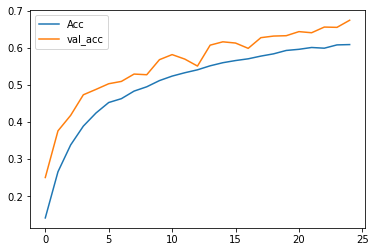

In [41]:
#Show accuracy graph
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Acc', 'val_acc'])
plt.show()

## Model Prediction

In [55]:
dict_label = {0:'airplane', 1:'automobile', 2:'bird',
              3:'cat', 4:'deer', 5:'dog',
              6:'frog', 7:'house', 8:'ship', 9:'truck'}
def predict():
  some_random_number = np.random.randint(low = 0, high = len(X_test)-1, size=4)
  sample_images = X_test[some_random_number]
  sample_label = Y_test[some_random_number]
  predicted = model_cnn.predict(sample_images)
  predicted = np.argmax(predicted, axis=1)
  true_label = np.argmax(sample_label, axis =1)
  fig, axs = plt.subplots(2, 2)
  for row in range(2):
    for col in range(2):
      if row == 0:
        true = true_label[row+col]
        pred = predicted[row+col]
        axs[row, col].imshow(sample_images[row+col+1])
      else:
        true = true_label[row+col+1]
        pred = predicted[row+col+1]
        axs[row, col].imshow(sample_images[row+col+1])
      axs[row, col].set_title('True: %s \nPredicted: %s' % (dict_label[true], dict_label[pred]))
      axs[row, col].axis('off')

1/1 [==============================] - 0s 17ms/step


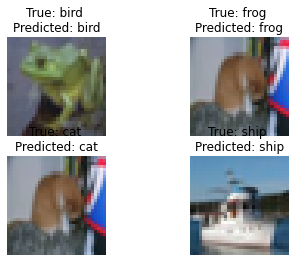

In [58]:
predict()